In [1]:
import matplotlib.pyplot as plt
import matplotlib as mtp
import math
import time
import numpy as np
from numpy import *
from collections import Counter
from scipy import interpolate
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
from matplotlib.backends.backend_pdf import PdfPages
import sys
import os
import pylab
from matplotlib import rc
from matplotlib.colors import LogNorm
from scipy.optimize import curve_fit
#import illustris_python as il
import seaborn as sns
import pandas as pan
import astropy
from pyagn import sed
from astropy import units as u

In [2]:
L_box=50.
h=0.6774
cte_G=6.67408*10**-8 ## cm3 g-1 s-2                                                                                                                                               
cte_m_p=1.6726*10**-24 ## g                                                                                                                                                       
cte_eps_r=0.1
cte_sigma_t=6.6524*10**-25 ## cm2                                                                                                                                                 
cte_c=2.998*10**10 ## cm s-1 

In [21]:
def plot_total_flux(self, distance, color, ax = None):
        """                                                                                                                                                                              
        Plot total flux in energy units.                                                                                                                                                 
        yaxis: EL_E [ keV keV / s / keV]                                                                                                                                                 
        xaxis: E [keV]                                                                                                                                                                   
        """
        if(ax is None):
            print("creating figure.")
            fig, ax = plt.subplots()
        
        #flux = self.corona_flux(distance) + self.disk_flux(distance) + self.warm_flux(distance)
        flux = self.total_flux(distance)
        return ax,list(self.energy_range),list(flux)

creating figure.


c:\Users\clara\AppData\Local\Programs\Python\Python37\lib\site-packages\pyagn\sed.py:230: RuntimeWarning: overflow encountered in exp
  planck_spectrum_exp = np.exp( energy / ( const.k_B *  temperature ))


creating figure.
[1.71330141e+35 3.49586341e+35 7.08120916e+35 1.42807004e+36
 2.86524171e+36 5.71439194e+36 1.13172732e+37 2.22317616e+37
 4.32601409e+37 8.32580452e+37 1.58217322e+38 2.96326264e+38
 5.45925890e+38 9.87443143e+38 1.75047309e+39 3.03738129e+39
 5.15564179e+39 8.56347606e+39 1.39376274e+40 2.22764977e+40
 3.50518893e+40 5.44133724e+40 8.34287278e+40 1.26318658e+41
 1.88611157e+41 2.77090688e+41 3.99359102e+41 5.62784756e+41
 7.72715277e+41 1.03019777e+42 1.33018233e+42 1.66205076e+42
 2.01448837e+42 2.38532633e+42 2.79295479e+42 3.28191167e+42
 3.91644443e+42 4.76323097e+42 5.87691394e+42 7.30151798e+42
 9.08617063e+42 1.13010825e+43 1.40437141e+43 1.74393754e+43
 2.16417629e+43 2.68370609e+43 3.32512838e+43 4.11556875e+43
 5.08755933e+43 6.27975445e+43 7.73735359e+43 9.51224216e+43
 1.16620386e+44 1.42477015e+44 1.73293834e+44 2.09566409e+44
 2.51516890e+44 2.98838547e+44 3.50284544e+44 4.03176512e+44
 4.52877919e+44 4.92501310e+44 5.13347414e+44 5.06539172e+44
 4.6613

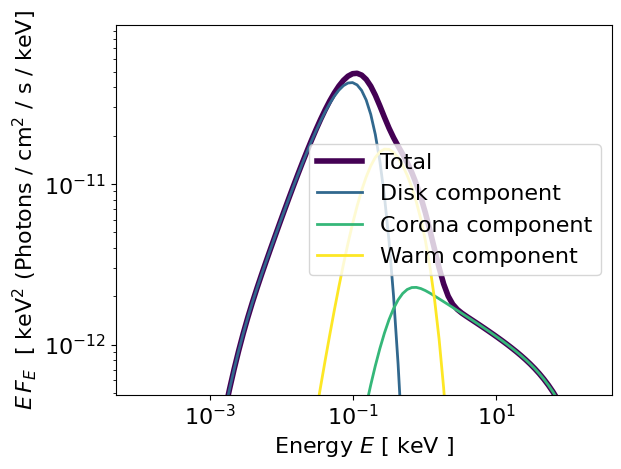

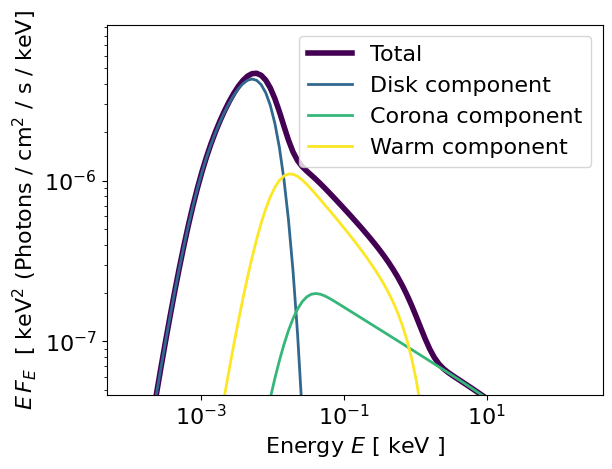

In [68]:
#M=1e3 ## BH mass
mdot=0.5 ## BH accretion rate in Edd units
astar=0. ## BH dimensionless spin absolute value.
hard_xray_fraction=0.02
corona_electron_energy=100
warm_electron_energy=0.2
warm_photon_index=2.5
reflection_albedo=0.3
distance = 16e+29
#distance = 1
#my_sed=sed.SED(M=M,mdot=mdot,astar=astar,hard_xray_fraction=hard_xray_fraction,corona_electron_energy=corona_electron_energy,warm_electron_energy=warm_electron_energy,reflection_albedo=reflection_albedo,reprocessing=True)
#print(1.24*1e-3/my_sed.energy_range)
#my_sed.plot_total_flux(distance)
#print(my_sed.total_flux(distance))
#plt.figure(1)
M = [1e5,1e10]
for i in range(len(M)):
    my_sed=sed.SED(M=M[i],mdot=mdot,astar=astar,hard_xray_fraction=hard_xray_fraction,corona_electron_energy=corona_electron_energy,warm_electron_energy=warm_electron_energy,reflection_albedo=reflection_albedo,reprocessing=True)
    #print(my_sed.energy_range_erg)
    #plt.plot(my_sed.energy_range, my_sed.total_flux(distance))
    my_sed.plot_total_flux(distance)
    #print(my_sed.total_flux(distance))
    #print(1.24e-3*my_sed.energy_range)

#my_sed.total_flux(distance)
energy = np.array(my_sed.energy_range)
#wavelength = 1.24*1e-3/energy
#print(my_sed.total_flux(10e10))
flux = np.array(my_sed.total_flux(distance))


#flux = 6.63e-27*flux
#luminosity = flux*(4*np.pi*(distance*distance))
#luminosity = luminosity*(energy*(2.42e+17))
#print(luminosity)

flux = (1.29e-10)*flux*(energy*energy)

luminosity = flux*(4*np.pi*(distance*distance))
#luminosity = luminosity*(12.4/energy)
print(luminosity)


#flux = flux/(1e-23)
#flux = flux/1e-6
#print(flux)
#flux = (1.29e-10)*flux*(energy*energy)
#print(flux)
#luminosity = flux*(4*np.pi*(distance*distance))/(3.826e+33)
#print(luminosity)
#print(y)
#x = 1
#print(x)
#plt.figure(2)
#plt.loglog(wavelength,luminosity)
#plt.ylim[1e-9,1e9]
plt.savefig('trial.pdf')

creating figure.
[1.01411597e+025 2.09872977e+025 4.33925933e+025 8.96256140e+025
 1.84899102e+026 3.80925909e+026 7.83524355e+026 1.60863662e+027
 3.29553008e+027 6.73443132e+027 1.37216280e+028 2.78631459e+028
 5.63547122e+028 1.13454358e+029 2.27180816e+029 4.52061293e+029
 8.93006558e+029 1.74918524e+030 3.39286252e+030 6.50740043e+030
 1.23216481e+031 2.29949579e+031 4.22280203e+031 7.62019021e+031
 1.34992876e+032 2.34707790e+032 4.00800418e+032 6.73450652e+032
 1.11657436e+033 1.83296864e+033 2.98928134e+033 4.85621355e+033
 7.87243378e+033 1.27462512e+034 2.06182058e+034 3.33215138e+034
 5.37981397e+034 8.67609110e+034 1.39743053e+035 2.24755101e+035
 3.60889511e+035 5.78391156e+035 9.24978905e+035 1.47558613e+036
 2.34721695e+036 3.72135701e+036 5.87730924e+036 9.24082063e+036
 1.44534428e+037 2.24683065e+037 3.46765200e+037 5.30648774e+037
 8.03917523e+037 1.20348201e+038 1.77634470e+038 2.57824974e+038
 3.66853480e+038 5.09887094e+038 6.89392360e+038 9.02310140e+038
 1.13664

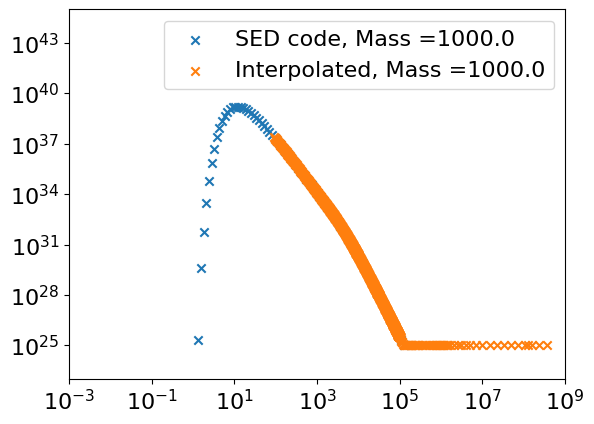

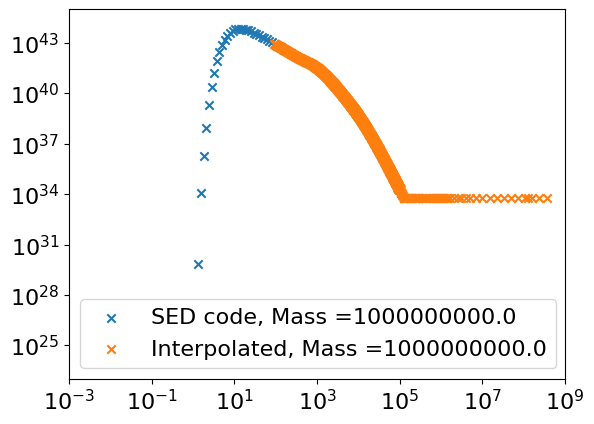

In [5]:
M=1e3 ## BH mass
mdot=0.5 ## BH accretion rate in Edd units
astar=0. ## BH dimensionless spin absolute value.
hard_xray_fraction=0.02
corona_electron_energy=100
warm_electron_energy=0.2
warm_photon_index=2.5
reflection_albedo=0.3
distance = 16e+29

my_sed=sed.SED(M=M,mdot=mdot,astar=astar,hard_xray_fraction=hard_xray_fraction,corona_electron_energy=corona_electron_energy,warm_electron_energy=warm_electron_energy,reflection_albedo=reflection_albedo,reprocessing=True)
my_sed.plot_total_flux(distance)
plt.clf()
energy = np.array(my_sed.energy_range)
flux = np.array(my_sed.total_flux(distance))
wavelength = 12.4/energy
flux = (1.29e-10)*flux*(energy*energy)

luminosity = flux*(4*np.pi*(distance*distance))
print(luminosity)
print(wavelength)
df = pan.read_csv('wavelength.txt',header=None)
xvals = df[0].to_numpy()
#print(xvals)
#print(np.flip(wavelength))
#print(np.flip(luminosity))
yvals = np.interp(xvals,np.flip(wavelength),np.flip(luminosity))
print(yvals)
plt.scatter(wavelength, luminosity, marker='x', label='SED code, Mass ='+str(M))
plt.scatter(xvals,yvals, marker= 'x', label='Interpolated, Mass ='+str(M))


plt.xlim([1e-3,1e9])
plt.xscale('log')
plt.yscale('log')
plt.xlim([1e-3,1e9])
plt.ylim([1e23,1e45])
plt.legend()


M=1e9 ## BH mass
mdot=0.5 ## BH accretion rate in Edd units
astar=0. ## BH dimensionless spin absolute value.
hard_xray_fraction=0.02
corona_electron_energy=100
warm_electron_energy=0.2
warm_photon_index=2.5
reflection_albedo=0.3
distance = 16e+29

my_sed=sed.SED(M=M,mdot=mdot,astar=astar,hard_xray_fraction=hard_xray_fraction,corona_electron_energy=corona_electron_energy,warm_electron_energy=warm_electron_energy,reflection_albedo=reflection_albedo,reprocessing=True)
my_sed.plot_total_flux(distance)
plt.clf()
energy = np.array(my_sed.energy_range)
flux = np.array(my_sed.total_flux(distance))
wavelength = 12.4/energy
flux = (1.29e-10)*flux*(energy*energy)

luminosity = flux*(4*np.pi*(distance*distance))
print(luminosity)
print(wavelength)
df = pan.read_csv('wavelength.txt',header=None)
xvals = df[0].to_numpy()
#print(xvals)
#print(np.flip(wavelength))
#print(np.flip(luminosity))
yvals = np.interp(xvals,np.flip(wavelength),np.flip(luminosity))
print(yvals)
plt.scatter(wavelength, luminosity, marker='x', label='SED code, Mass ='+str(M))
plt.scatter(xvals,yvals, marker= 'x', label='Interpolated, Mass ='+str(M))




plt.xlim([1e-3,1e9])
plt.xscale('log')
plt.yscale('log')
plt.xlim([1e-3,1e9])
plt.ylim([1e23,1e45])
plt.legend()

[3.29670330e+16 3.19148936e+16 3.12500000e+16 ... 1.87500000e+10
 1.25000000e+10 8.33333333e+09]
[-4.24666667e-17 -4.38666667e-17 -4.48000000e-17 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
[-1.4 -1.4 -1.4 ...  0.   0.   0. ]


Text(0.5, 0, '$\\lambda$ in A')

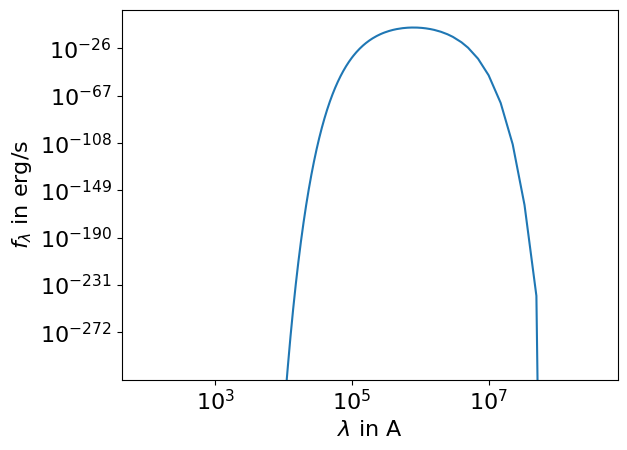

In [31]:
#volonteri
def sed_v(xvals,bh_mass, eddington_ratio):
    alpha_UV = -0.5
    la = np.log10(bh_mass)
    mu = eddington_ratio
    h = 6.626e-34 #J hz-1
    k = 1.38e-23 #JK-1
    T_BB = 1e6
    T_peak = 10**((la-mu)/4)
    T_BB = T_peak
    T_IR = (0.01*2.179e-18)/k #Ryd/k
    a = -1.4
    #a = -(T_peak/(3e4))**0.82
    alpha_x =- 1
    print(xvals)
    #y = np.zero(len(xvals))
    y = (np.power(xvals,(alpha_UV)))*np.exp(-(h*xvals)/(k*T_BB))*np.exp(-T_IR*k/(h*xvals)) + a*(np.power(xvals,(alpha_x)))
    y[xvals <3.288e+14] = (np.power(xvals[xvals < 3.288e+14],(alpha_UV)))*np.exp(-(h*xvals[xvals < 3.288e+14])/(k*T_BB))*np.exp(-T_IR*k/(h*xvals[xvals < 3.288e+14]))
    
    
    print(y)
    return(y)

df = pan.read_csv('wavelength.txt',header=None)
xvals = df[0].to_numpy()
nu = 3e18/xvals
f_nu = sed_v(nu,1e3,-2)
f_lambda = 3e18*f_nu/(xvals*xvals)

flux = f_lambda*xvals
print(flux)
#plt.loglog(nu,f_nu*nu)
plt.loglog(xvals, f_lambda)
#plt.ylim(1e-6,1e9)
plt.ylabel(r'$f_{\lambda}$ in erg/s')
plt.xlabel(r'$\lambda$ in A')

-1.78125
[1.00257413e-04 1.00774229e-04 1.01293709e-04 ... 4.93614069e+02
 4.96158595e+02 4.98716238e+02]


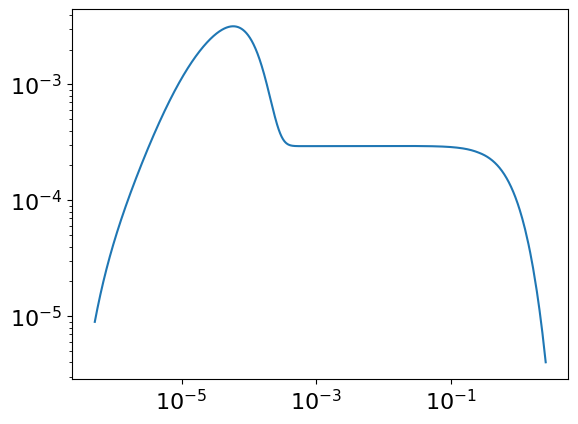

In [39]:
import oxaf
peak = oxaf.find_E_peak(L=1,M=6,r=2)
E,B,F = oxaf.full_spectrum(E_peak=np.log10(9.9e-3), Gamma=2, p_NT=0.41)             #cloudy comparison
peak = oxaf.find_E_peak(L=1,M=8,r=2)
print(peak)
print(E)
plt.loglog(B,F)

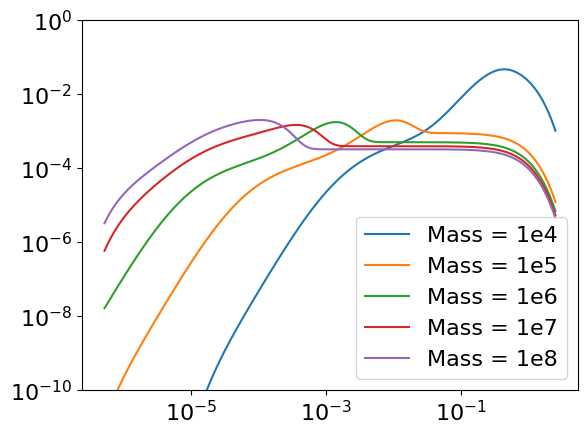

In [45]:
import oxaf
M = [4,5,6,7,8]
for i in range(len(M)):
    peak = oxaf.find_E_peak(L=1,M=M[i],r=2)
    E,B,F = oxaf.full_spectrum(E_peak=peak, Gamma=2, p_NT=0.43)      
    plt.plot(B,F, label="Mass = 1e"+str(M[i]))
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-10,1)
plt.legend()